In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv("./insurance.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [13]:
df.columns

Index(['age', 'affordibility', 'bought_insurance'], dtype='object')

In [16]:
df.drop('bought_insurance',axis='columns')

,age,affordibility
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,0
8,62,1
9,61,1


In [17]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x  = sx.fit_transform(df.drop('bought_insurance',axis='columns'))
scaled_y  = sy.fit_transform(df[['bought_insurance']])

In [19]:
scaled_y

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [18]:
scaled_x

array([[0.09090909, 1.        ],
       [0.15909091, 0.        ],
       [0.65909091, 1.        ],
       [0.77272727, 0.        ],
       [0.63636364, 1.        ],
       [0.86363636, 1.        ],
       [0.84090909, 0.        ],
       [0.95454545, 0.        ],
       [1.        , 1.        ],
       [0.97727273, 1.        ],
       [0.        , 1.        ],
       [0.22727273, 1.        ],
       [0.20454545, 0.        ],
       [0.25      , 0.        ],
       [0.70454545, 1.        ],
       [0.84090909, 1.        ],
       [0.15909091, 0.        ],
       [0.90909091, 1.        ],
       [0.02272727, 0.        ],
       [0.        , 1.        ],
       [0.06818182, 1.        ],
       [0.18181818, 0.        ],
       [0.5       , 1.        ],
       [0.61363636, 1.        ],
       [0.72727273, 1.        ],
       [0.81818182, 1.        ],
       [0.11363636, 1.        ],
       [0.63636364, 1.        ]])

In [58]:
def batch_GD(X,y_true,epochs,learning_rate=0.1):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b =0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list=[]
    
    for i in range(epochs):
        
        # y_pred = w1*X[0] + w2*X[1] + b
        y_pred = np.dot(w,X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples)*np.sum(y_true-y_pred)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true - y_pred))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list



In [59]:
w,b,cost,cost_list,epoch_list = batch_GD(scaled_x,scaled_y.reshape(scaled_y.shape[0]),500,0.05)
w,b,cost

(array([0.94025312, 0.26599954]), -0.14835577620693624, 0.11215780033037472)

In [ ]:
epoch_list

In [31]:
cost_list

[]

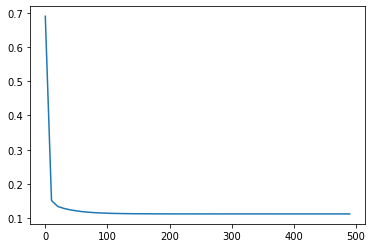

In [60]:
plt.plot(epoch_list,cost_list)

In [61]:
import math
def predict(age, affordibility,w,b):
    scaled_x = sx.transform([[age, affordibility]])[0]
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return math.floor(abs(sy.inverse_transform([[scaled_price]])[0][0]))

predict(47,1,w,b)

d:\PYTHON\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0

In [67]:
import random
def stochaistic_GD(X,y_true,epochs,learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b =0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list=[]
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]
        y_pred = np.dot(w,sample_X.T) + b
        
        w_grad = -(2/total_samples)*(sample_X.T.dot(sample_y-y_pred))
        b_grad = -(2/total_samples)*(sample_y-y_pred)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = (np.square(sample_y - y_pred))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    # print('cost ',cost)
    return w,b,cost,cost_list,epoch_list

In [69]:
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochaistic_GD(scaled_x,scaled_y.reshape(scaled_y.shape[0]),10000,0.05)
w_sgd,b_sgd,cost_sgd

(array([0.95425647, 0.2653483 ]), -0.1714238413745002, 0.5002072009436919)

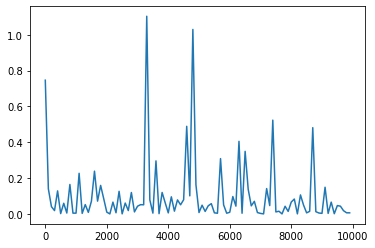

In [70]:
plt.plot(epoch_list_sgd,cost_list_sgd)